# Testing: OLS example

## Data description

We use the *diabetes* data set which is accessible via the *sklearn* Python package to demonstrate the OLS estimator. The dataset contains 442 observations on a person's desease progression (dependent variable) and ten explanatory variables on age, sex, BMI, and various blood values. A summary of the data set can be found below.

In [60]:
import pandas as pd #to load data

df = pd.read_csv("diabetes.txt", sep = ",", header = 0) #load data
df #show summary of data


age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
396 -0.085430  0.050680 -0.030996 -0.022885 -0.063487 -0.054236  0.019187   
397  0.052606 -0.044642 -0.004050 -0.030918 -0.046975 -0.058307 -0.013948   
398  0.012648 -0.044642  0.015350 -0.033214  0.041086  0.032193 -0.002903   
399  0.059871  0.050680  0.022895  0.049415  0.016318  0.011838 -0.013948   
400 -0.023677 -0.044642  0.045529  0.090730 -0.018080 -0.035447  0.070730   

           s4        s5        s6  desease progression  
0   -0.002592  0.019908 -0.017646                151.0  
1   -0.039493 -0.068330 -0.092204                 75.0  
2   -0.002592  0.002864 -0.025930                141.0  
3    0.034309  0.022692 -0.009362                206.0  
4   -0.002592 -0.031991 -0.046641                135.0  
..        ...       ...       ...                  ...  
396 -0.039493 -0.096433 -0.034215                 43.0  
397 -0.025840  0.036056  0.023775                198.0  
398 -0.002592  0.045066 -0.067351                242.0  
399 -0.002592  0.039540  0.019633                232.0  
400 -0.039493 -0.034524 -0.009362                175.0  

[401 rows x 11 columns]

In [53]:
df.describe() #show summary statistics of data

age         sex         bmi          bp          s1          s2  \
count  401.000000  401.000000  401.000000  401.000000  401.000000  401.000000   
mean    -0.000052    0.000761   -0.000325    0.000316   -0.000728   -0.001046   
std      0.047874    0.047667    0.046876    0.047086    0.047292    0.047115   
min     -0.107226   -0.044642   -0.090275   -0.112400   -0.126781   -0.115613   
25%     -0.038207   -0.044642   -0.034229   -0.033214   -0.034592   -0.030437   
50%      0.005383   -0.044642   -0.007284   -0.005671   -0.004321   -0.006637   
75%      0.038076    0.050680    0.030440    0.035644    0.025950    0.026243   
max      0.110727    0.050680    0.170555    0.132044    0.153914    0.198788   

               s3          s4          s5          s6  desease progression  
count  401.000000  401.000000  401.000000  401.000000           401.000000  
mean    -0.000135   -0.000273    0.000353   -0.000912           152.635910  
std      0.047218    0.047653    0.048166    0.047560            77.268215  
min     -0.102307   -0.076395   -0.126097   -0.129483            25.000000  
25%     -0.036038   -0.039493   -0.033249   -0.034215            87.000000  
50%     -0.006584   -0.002592   -0.001499   -0.001078           141.000000  
75%      0.030232    0.034309    0.032433    0.027917           214.000000  
max      0.181179    0.185234    0.133599    0.135612           346.000000

## Linear regression

We use a simple linear regression model to explain desease progression through age using the OLS estimator. The results table is shown below.

In [54]:
import numpy as np #to transform dataframe into array for regression
from sklearn.linear_model import LinearRegression #to perform the linear regression

In [55]:
X = df.iloc[:,0] #only consider age for the regression
Y = df.iloc[:,10] #get the dependent variable
x = X.values.reshape(-1,1) #re-shaping into array
y = Y.values.reshape(-1,1)

In [56]:
regr = LinearRegression() #generate the regression model
regr.fit(x, y)

LinearRegression()

In [57]:
#generate the summary table
import statsmodels.api as sm
X_const = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X_const).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     desease progression   R-squared:                       0.035
Model:                             OLS   Adj. R-squared:                  0.032
Method:                  Least Squares   F-statistic:                     14.27
Date:                 Fri, 21 Aug 2020   Prob (F-statistic):           0.000183
Time:                         10:36:17   Log-Likelihood:                -2304.7
No. Observations:                  401   AIC:                             4613.
Df Residuals:                      399   BIC:                             4621.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.6516      3.796     40.212      0.000     145.189     160.115
age          299.8772     79.394      3.777      0.000     143.794     455.960
==============================================================================
Omnibus:                       47.474   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.838
Skew:                           0.427   Prob(JB):                     6.66e-06
Kurtosis:                       2.165   Cond. No.                         20.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual plot

As a further sense check, we plot the residuals against the explanatory variable, i.e. age.

In [58]:
#calculate residuals
y_predicted = regr.predict(x)
residual = y - y_predicted

Text(0, 0.5, 'Residual')

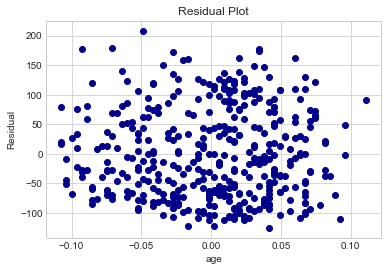

In [59]:
#generate residual plot
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
plt.plot(x, residual, "o", color = "darkblue")
plt.title("Residual Plot")
plt.xlabel("age")
plt.ylabel("Residual")